In [1]:
import os

train_dir = 'E:/kaggle/coffee bean/train'
test_dir = 'E:/kaggle/coffee bean/test'
train_dark_dir = 'E:/kaggle/coffee bean/train/Dark'
train_green_dir = 'E:/kaggle/coffee bean/train/Green'
train_light_dir = 'E:/kaggle/coffee bean/train/Light'
train_medium_dir = 'E:/kaggle/coffee bean/train/Medium'
test_dark_dir = 'E:/kaggle/coffee bean/test/Dark'
test_green_dir = 'E:/kaggle/coffee bean/test/Green'
test_light_dir = 'E:/kaggle/coffee bean/test/Light'
test_medium_dir = 'E:/kaggle/coffee bean/test/Medium'


print('Total training dark images:', len(os.listdir(train_dark_dir)))
print('Total Training green images:', len(os.listdir(train_green_dir)))  
print('Total training medium images:', len(os.listdir(train_medium_dir)))
print('Total training light images:', len(os.listdir(train_light_dir)))
      
print('Total test dark images:', len(os.listdir(test_dark_dir)))
print('Total test green images:', len(os.listdir(test_green_dir)))  
print('Total test medium images:', len(os.listdir(test_medium_dir)))
print('Total test light images:', len(os.listdir(test_light_dir)))

Total training dark images: 300
Total Training green images: 300
Total training medium images: 300
Total training light images: 300
Total test dark images: 100
Total test green images: 100
Total test medium images: 100
Total test light images: 100


In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dropout

#Model buliding
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,  rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224, 224), batch_size = 20, class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size = (224, 224), batch_size = 20, class_mode = 'categorical')

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [4]:
history = model.fit(train_data, steps_per_epoch = len(train_data), epochs = 20, validation_data=test_data,
                     validation_steps = int(0.25*len(test_data)))


Epoch 1/20
60/60 [==============================] - 139s 2s/step - loss: 0.9868 - acc: 0.5792 - val_loss: 0.3494 - val_acc: 0.9100
Epoch 2/20
60/60 [==============================] - 113s 2s/step - loss: 0.1953 - acc: 0.9417 - val_loss: 0.4396 - val_acc: 0.8500
Epoch 3/20
60/60 [==============================] - 119s 2s/step - loss: 0.1712 - acc: 0.9408 - val_loss: 0.1589 - val_acc: 0.9600
Epoch 4/20
60/60 [==============================] - 115s 2s/step - loss: 0.1361 - acc: 0.9558 - val_loss: 0.0540 - val_acc: 0.9700
Epoch 5/20
60/60 [==============================] - 132s 2s/step - loss: 0.0984 - acc: 0.9650 - val_loss: 0.2029 - val_acc: 0.9200
Epoch 6/20
60/60 [==============================] - 120s 2s/step - loss: 0.1355 - acc: 0.9475 - val_loss: 0.1272 - val_acc: 0.9600
Epoch 7/20
60/60 [==============================] - 113s 2s/step - loss: 0.0876 - acc: 0.9725 - val_loss: 0.0565 - val_acc: 0.9800
Epoch 8/20
60/60 [==============================] - 117s 2s/step - loss: 0.1278 - a

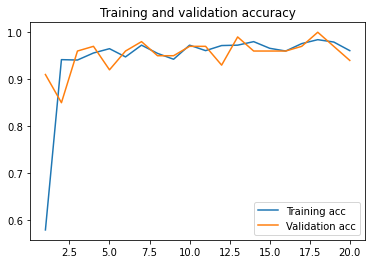

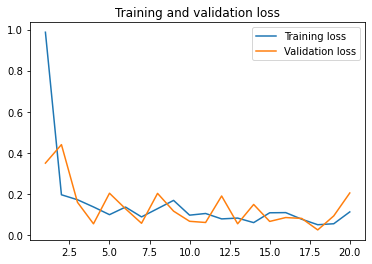

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
model.evaluate(test_data)

20/20 [==============================] - 14s 682ms/step - loss: 0.1730 - acc: 0.9475


[0.17302662134170532, 0.9474999904632568]